# **Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition**

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
We will use a subset of the original data to save some computation time in this project. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.8.0


## **Load the dataset**
- Load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Check the number of images in the training and testing data.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

In [6]:
X_train.shape

(42000, 32, 32)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Complete the below code to visualize the first 10 images from the training data**

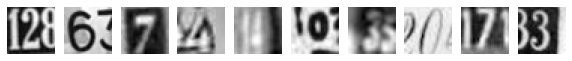

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')
    #plt.xlabel(class_names_list[y_train[i]])

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [8]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [10]:
# Normalize inputs from 0-255 to 0-1
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **One-hot encode the labels in the target variable y_train and y_test**

In [12]:
len(y_train)
len(y_test)

18000

In [13]:
#Write the function and appropriate variable name to one-hot encode the output

y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

After data preprocessing, build a CNN model.

In [14]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Build and train a CNN model as per the above mentioned architecture**

In [15]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers


#Define the function
def cnn_model_1():
    model = Sequential() 

    #Add layers as per the architecture mentioned above in the same sequence
    
    # First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    # Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    
    # Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    # Another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Flatten the output from the previous layer
    model.add(Flatten())
    # Add a dense layer with 32 nodes
    model.add(Dense(32))
    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # Output layer with 10 neurons, which is the same number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [16]:
#Build the model
model_1 = cnn_model_1()

In [17]:
#Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [18]:
# use this function tf.keras.utils.plot_model to see the input and output dimensions

In [19]:
# Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs.
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=20, shuffle=True)


Epoch 1/20
1050/1050 [==============================] - 16s 4ms/step - loss: 1.1929 - accuracy: 0.6041 - val_loss: 0.6403 - val_accuracy: 0.8144
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5311 - accuracy: 0.8480 - val_loss: 0.5108 - val_accuracy: 0.8557
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4386 - accuracy: 0.8727 - val_loss: 0.4929 - val_accuracy: 0.8615
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3855 - accuracy: 0.8869 - val_loss: 0.4509 - val_accuracy: 0.8773
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3401 - accuracy: 0.8974 - val_loss: 0.4979 - val_accuracy: 0.8583
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2999 - accuracy: 0.9106 - val_loss: 0.4651 - val_accuracy: 0.8738
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2748 - accuracy: 0.9163 - val_loss: 0.4451 - val_accuracy

### **Plotting the validation and training accuracies**

#### **Observations on the below plot**

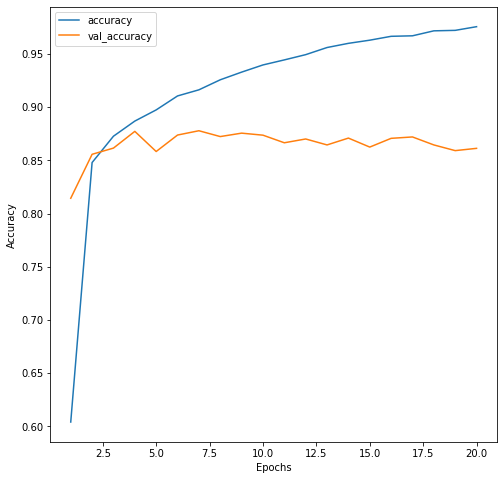

In [31]:
# plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- The training accuracy increases slightly from 0.85 to 0.99 from iteration = 2 to 20. 
- The validation accuracy converages around 5 epochs but starts to decrease after 18.
- The CNN model results in greater than 85% accuracy in both training and validation datasets.
- The validation accuracy is different than the training accuracy, indicating poor generalization. Potential overfitting of the training data. Consider batch normalization, dropout, and etc.

Build another model to see if we can get better generalized performance.

Clear the previous model's history from the keras backend first and fix the seed again after clearing the backend.

In [32]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [33]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Build and train the second CNN model as per the above mentioned architecture**

In [23]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    
    # First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape. Input shape is very important.
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    # Add a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    
    # Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    # Another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # A max-pool layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Add a BatchNormalization layer
    model.add(BatchNormalization())

    #Third Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))

    # Fourth Convolutional layer 64 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    # Another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # A max-pool layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Add a BatchNormalization layer
    model.add(BatchNormalization())
    # Flatten the output from the previous layer
    model.add(Flatten())
    # Add a dense layer with 32 nodes
    model.add(Dense(32))
    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # Add a dropout layer with rate equal to 0.5
    model.add(Dropout(0.5))

    # Output layer with 10 neurons, which is the same number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [24]:
# Build the model
model_2 = cnn_model_2()

In [25]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

** Param = NumOfInputs * NumOfNodes in each layer 



In [26]:
# Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs.
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30, shuffle=True)

Epoch 1/30
263/263 [==============================] - 4s 10ms/step - loss: 1.4672 - accuracy: 0.4955 - val_loss: 3.4987 - val_accuracy: 0.1408
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.7180 - accuracy: 0.7763 - val_loss: 0.7550 - val_accuracy: 0.7602
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5867 - accuracy: 0.8191 - val_loss: 0.4954 - val_accuracy: 0.8573
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5221 - accuracy: 0.8386 - val_loss: 0.4978 - val_accuracy: 0.8539
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4840 - accuracy: 0.8532 - val_loss: 0.3838 - val_accuracy: 0.8905
Epoch 6/30
263/263 [==============================] - 2s 8ms/step - loss: 0.4481 - accuracy: 0.8621 - val_loss: 0.4248 - val_accuracy: 0.8792
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4230 - accuracy: 0.8715 - val_loss: 0.4695 - val_accuracy: 0.8621
Epoc

### **Plotting the validation and training accuracies**

#### **Write your observations on the below plot**

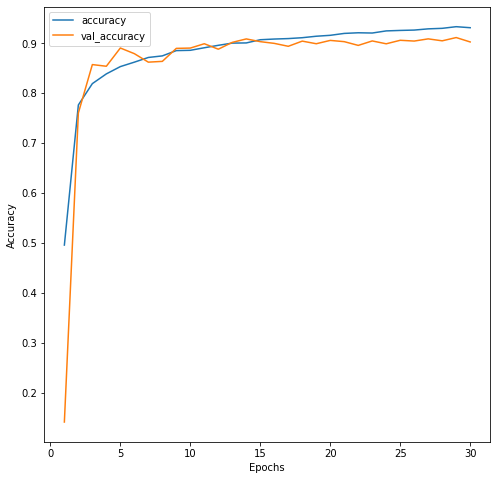

In [27]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- The accuracy coverages after 5 iterations.
- The second iteration of this model performs better than the first one. 
- Even though the training accuracy drops slightly, the validation accuracy has improved to more than 90%. 
- Overfitting problem is also reduced as the validation accuracy is very similar to the training accuracy.  

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

#### **Make predictions on the test data using the second model**

In [28]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Final observations on the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.89      0.90      0.90      1828
           2       0.94      0.88      0.91      1803
           3       0.90      0.86      0.88      1719
           4       0.89      0.94      0.91      1812
           5       0.90      0.89      0.90      1768
           6       0.87      0.90      0.88      1832
           7       0.95      0.89      0.92      1808
           8       0.90      0.87      0.88      1812
           9       0.87      0.91      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



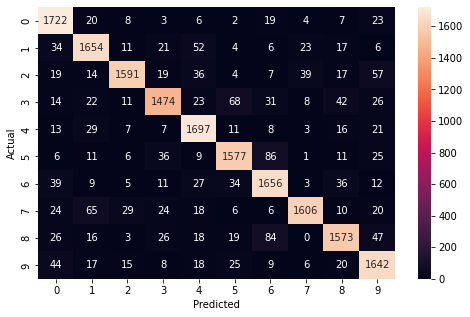

In [30]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**
- Overall, the precision and recall are above 0.85 for all classes with more than 90% accuracy. 
- The inputs are relatively even distributed in each class with about 1800 data point. 
- This is a promosing model in predicting the classes correctly.
